<h1 align="center">Credit Card Fraud Risk Prediction Model</h1>

### Context

Credit score cards are a common risk control method in the financial industry. It uses personal information and data submitted by credit card applicants to predict the probability of future defaults and credit card borrowings. The bank is able to decide whether to issue a credit card to the applicant. Credit scores can objectively quantify the magnitude of risk.
 
Generally speaking, credit score cards are based on historical data. Once encountering large economic fluctuations. Past models may lose their original predictive power. Logistic model is a common method for credit scoring. Because Logistic is suitable for binary classification tasks and can calculate the coefficients of each feature. In order to facilitate understanding and operation, the score card will multiply the logistic regression coefficient by a certain value (such as 100) and round it.
 
At present, with the development of **machine learning algorithms**. More predictive methods such as Boosting, Random Forest, and Support Vector Machines have been introduced into credit card scoring. However, these methods often do not have good transparency. It may be difficult to provide customers and regulators with a reason for rejection or acceptance.

### Problem Statement

Build a model to predict Whether the Credit Card Fraud Risk is there or not

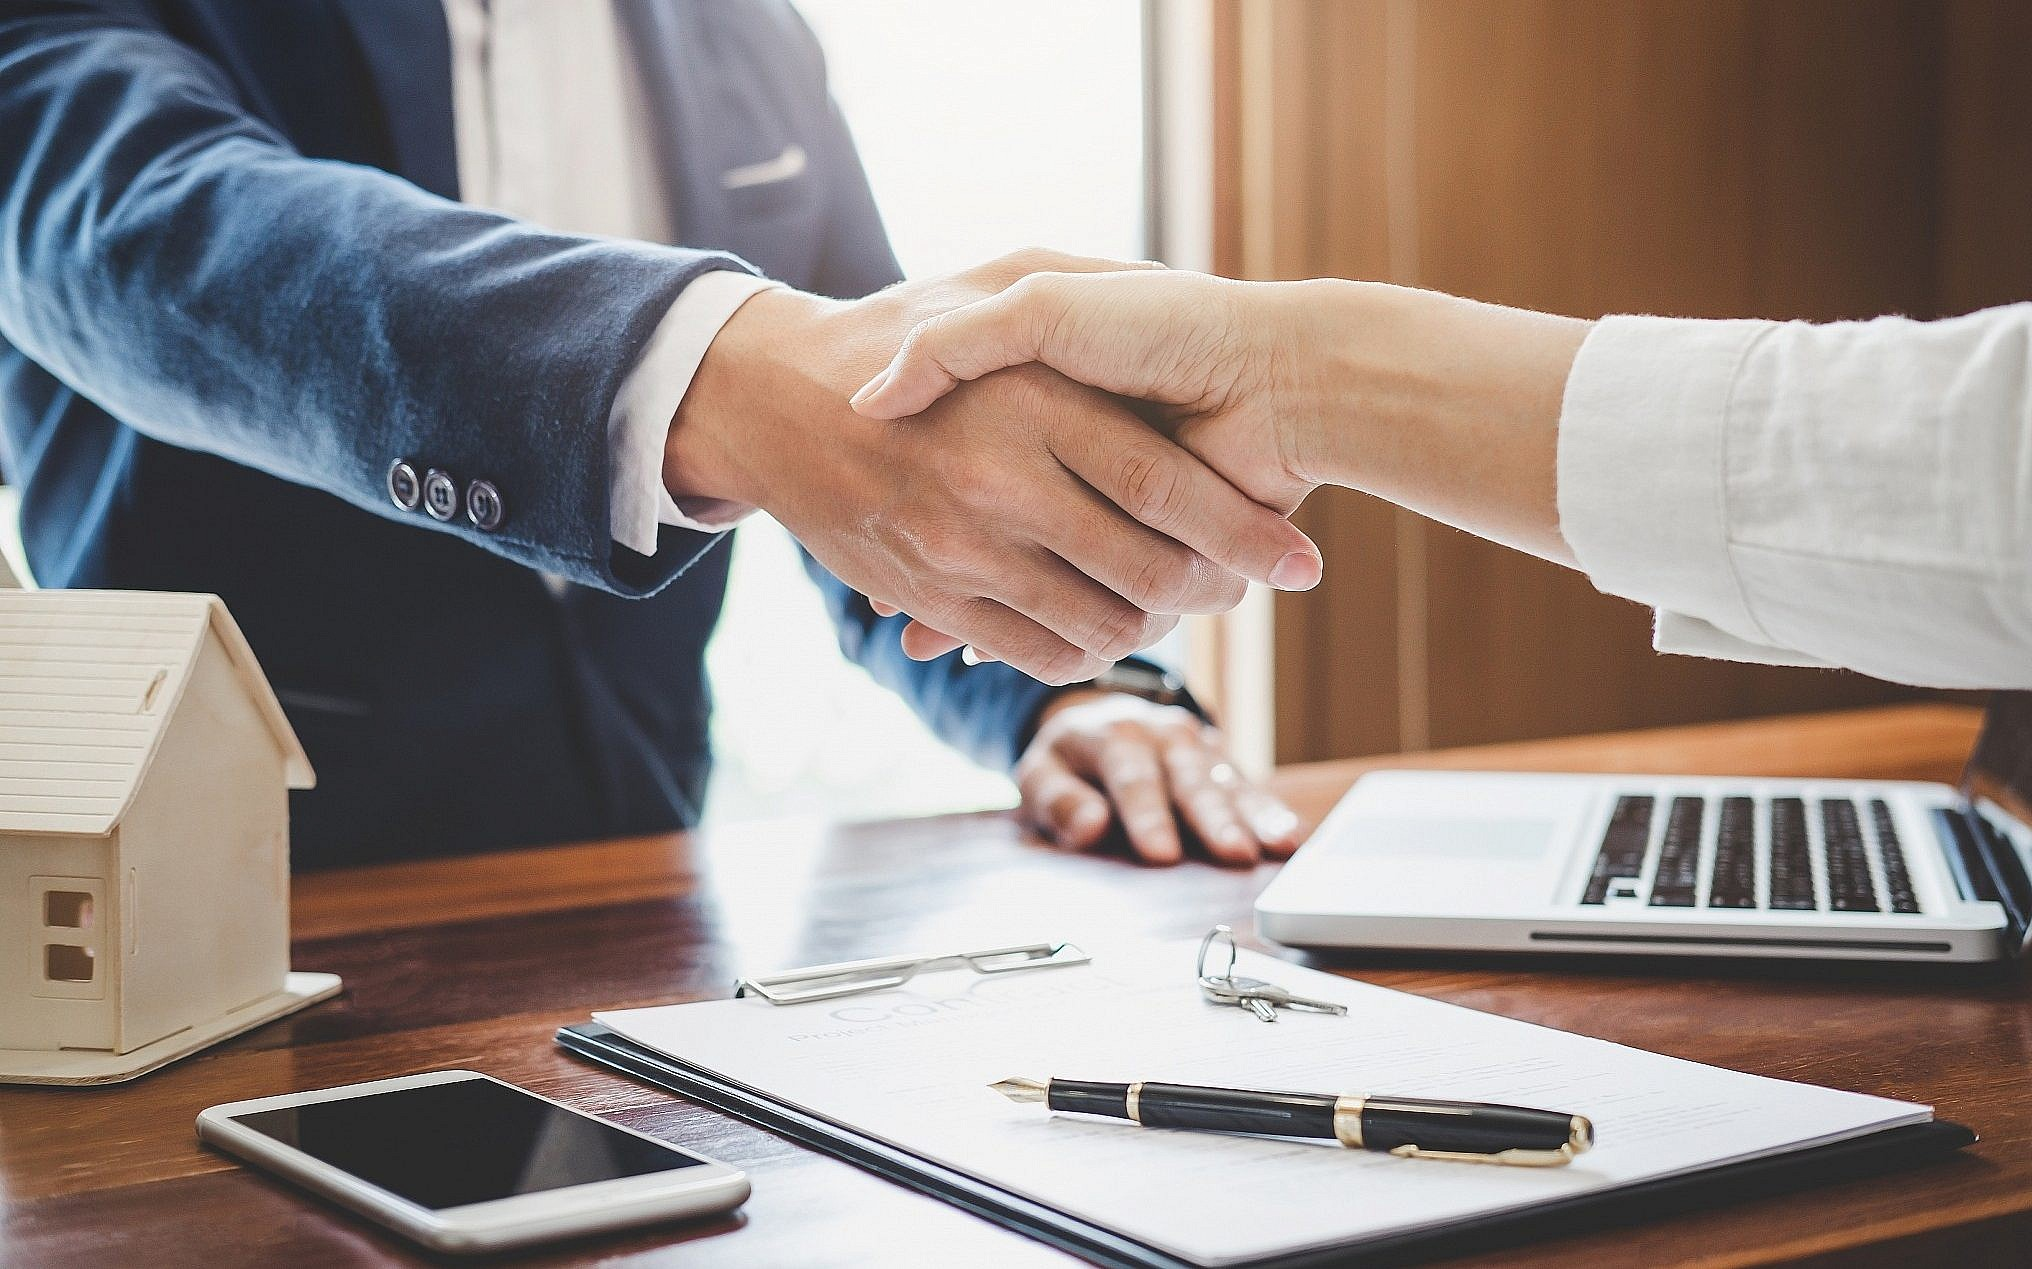

### About Dataset

The data on this study are **Credit Card Fraud Risk** data which are including Gender, Married, Dependents, Education, Self_Employed, ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Term, Credit_History_Available, Housing Locality, Fraud_Risk etc. They are collected by Google's Kaggle.

### Abstract

<h3 align="center">Dataset Details</h3>
    
    
|<h5 align="center">Field</h5> | <h5 align="center">Description</h5> |
|------|-------------|
|<h5 align="left">Gender :</h5>|<h5 align="left">Gender of the applicant (Female/Male)</h5>|
|<h5 align="left">Married :</h5>|<h5 align="left">Marital status of the applicant (Married/single)</h5>|
|<h5 align="left">Dependents :</h5>|<h5 align="left">The applicant is dependent on some one or not</h5>|
|<h5 align="left">Education :</h5>|<h5 align="left">whether the applicant is educated or not</h5>|
|<h5 align="left">Self Employed :</h5>|<h5 align="left">Applicant is Self Employed or not</h5>|
|<h5 align="left">Applicant Income :</h5>|<h5 align="left">Income status of the applicant</h5>|
|<h5 align="left">Coapplicant Income :</h5>|<h5 align="left">Income status of the coapplicant</h5>|
|<h5 align="left">Credit History :</h5>|<h5 align="left">Applicant Credit History Availablity</h5>|
|<h5 align="left">LoanAmount :</h5>|<h5 align="left">Applicant Loan amount status </h5>|
|<h5 align="left">Loan Term :</h5>|<h5 align="left">Applicant Loan term status</h5>|
|<h5 align="left">Housing :</h5>|<h5 align="left">The Applicant has house or not</h5>|
|<h5 align="left">Locality :</h5>|<h5 align="left">Applicant Locality status</h5>|
|<h5 align="left">Fraud Risk :</h5>|<h5 align="left">Whether the fraud risk is there or not</h5>|


Fraud Risk Prediction model implementation, and performance evaluation are conducted with pre-processing.

#### Table of Contents:
* Importing Libraries
* Reading and Preparing the dataset 
* Exploring the data
* Cleaning the data 
* Exracting the data
* Visualizing the data 
* Creating a model
* Conclusion 

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix,plot_confusion_matrix, plot_roc_curve,roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
%matplotlib inline
import time
import warnings
warnings.filterwarnings('ignore')

## Reading the dataset

In [2]:
d=pd.read_csv('fraud.csv')
d

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Term,Credit_History_Available,Housing,Locality,Fraud_Risk
0,1,0,0,1,0,5849,0,146,360,1,1,1,0
1,1,1,1,1,1,4583,1508,128,360,1,1,3,1
2,1,1,0,1,1,3000,0,66,360,1,1,1,1
3,1,1,0,0,1,2583,2358,120,360,1,1,1,1
4,1,0,0,1,0,6000,0,141,360,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
822,0,0,1,1,0,2872,1556,91,360,1,1,1,0
823,0,0,1,1,1,8596,0,162,360,1,1,2,0
824,1,0,1,1,1,3664,0,109,215,1,1,1,0
825,1,0,2,1,0,4921,0,162,360,0,1,2,0


## Exploring the data

In [3]:
d.shape

(827, 13)

**Check data types**

In [4]:
d.dtypes

Gender                      int64
Married                     int64
Dependents                  int64
Education                   int64
Self_Employed               int64
ApplicantIncome             int64
CoapplicantIncome           int64
LoanAmount                  int64
Loan_Term                   int64
Credit_History_Available    int64
Housing                     int64
Locality                    int64
Fraud_Risk                  int64
dtype: object

**Top & Bottom 5 Details**

In [5]:
d.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Term,Credit_History_Available,Housing,Locality,Fraud_Risk
0,1,0,0,1,0,5849,0,146,360,1,1,1,0
1,1,1,1,1,1,4583,1508,128,360,1,1,3,1
2,1,1,0,1,1,3000,0,66,360,1,1,1,1
3,1,1,0,0,1,2583,2358,120,360,1,1,1,1
4,1,0,0,1,0,6000,0,141,360,1,1,1,0


In [6]:
d.tail()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Term,Credit_History_Available,Housing,Locality,Fraud_Risk
822,0,0,1,1,0,2872,1556,91,360,1,1,1,0
823,0,0,1,1,1,8596,0,162,360,1,1,2,0
824,1,0,1,1,1,3664,0,109,215,1,1,1,0
825,1,0,2,1,0,4921,0,162,360,0,1,2,0
826,1,0,0,1,0,3847,0,78,360,1,1,2,0


**All Columns**

In [7]:
d.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Term',
       'Credit_History_Available', 'Housing', 'Locality', 'Fraud_Risk'],
      dtype='object')

**Basic & Statistical information**

In [8]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 827 entries, 0 to 826
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Gender                    827 non-null    int64
 1   Married                   827 non-null    int64
 2   Dependents                827 non-null    int64
 3   Education                 827 non-null    int64
 4   Self_Employed             827 non-null    int64
 5   ApplicantIncome           827 non-null    int64
 6   CoapplicantIncome         827 non-null    int64
 7   LoanAmount                827 non-null    int64
 8   Loan_Term                 827 non-null    int64
 9   Credit_History_Available  827 non-null    int64
 10  Housing                   827 non-null    int64
 11  Locality                  827 non-null    int64
 12  Fraud_Risk                827 non-null    int64
dtypes: int64(13)
memory usage: 84.1 KB


In [9]:
d.describe().T

,count,mean,std,min,25%,50%,75%,max
Gender,827.0,0.733978,0.442143,0.0,0.0,1.0,1.0,1.0
Married,827.0,0.481258,0.499951,0.0,0.0,0.0,1.0,1.0
Dependents,827.0,0.652963,0.935835,0.0,0.0,0.0,1.0,3.0
Education,827.0,0.790810,0.406976,0.0,1.0,1.0,1.0,1.0
Self_Employed,827.0,0.574365,0.494738,0.0,0.0,1.0,1.0,1.0
ApplicantIncome,827.0,5212.970979,5593.713304,150.0,2894.5,3752.0,5478.0,81000.0
CoapplicantIncome,827.0,1486.050786,2802.847983,0.0,0.0,0.0,2177.0,41667.0
LoanAmount,827.0,140.892382,79.820451,9.0,100.0,125.0,156.5,700.0
Loan_Term,827.0,338.128174,75.353151,12.0,360.0,360.0,360.0,480.0
Credit_History_Available,827.0,0.885127,0.319062,0.0,1.0,1.0,1.0,1.0


## Cleaning the Dataset

- **Check the null values**
- **Check the duplicates**

In [10]:
d.isnull().sum()

Gender                      0
Married                     0
Dependents                  0
Education                   0
Self_Employed               0
ApplicantIncome             0
CoapplicantIncome           0
LoanAmount                  0
Loan_Term                   0
Credit_History_Available    0
Housing                     0
Locality                    0
Fraud_Risk                  0
dtype: int64

In [11]:
d.duplicated().sum()

3

In [12]:
d.drop_duplicates(inplace=True)

## Extracting dataset

In [13]:
d.nunique()

Gender                        2
Married                       2
Dependents                    4
Education                     2
Self_Employed                 2
ApplicantIncome             688
CoapplicantIncome           354
LoanAmount                  223
Loan_Term                    44
Credit_History_Available      2
Housing                       2
Locality                      3
Fraud_Risk                    2
dtype: int64

In [14]:
print("Gender types     : 0 - Female 1 - Male ",d['Gender'].unique()) 
print("Marital status   : 0 - Single 1 - Married",d['Married'].unique())
print("Unique Education : 0 - Not Educated 1 - Educated",d['Education'].unique())
print("Unique Employment: 0 - Not Self Employed 1 - Self Employed",d['Self_Employed'].unique())
print("Unique Fraud_Risk: 0 - No 1 - Yes",d['Fraud_Risk'].unique())

Gender types     : 0 - Female 1 - Male  [1 0]
Marital status   : 0 - Single 1 - Married [0 1]
Unique Education : 0 - Not Educated 1 - Educated [1 0]
Unique Employment: 0 - Not Self Employed 1 - Self Employed [0 1]
Unique Fraud_Risk: 0 - No 1 - Yes [0 1]


**Fraud Risk based on important parameters**

In [15]:
d[['Gender','Self_Employed','ApplicantIncome','Education','Fraud_Risk']][(d['Fraud_Risk']==1)]

,Gender,Self_Employed,ApplicantIncome,Education,Fraud_Risk
1,1,1,4583,1,1
2,1,1,3000,1,1
3,1,1,2583,0,1
5,1,1,5417,1,1
6,1,1,2333,0,1
...,...,...,...,...,...
608,1,1,3232,1,1
610,1,1,4106,1,1
611,1,1,8072,1,1
612,1,1,7583,1,1


**Fraud Risk Baseed on Gender = Male ,income & employment**

In [16]:
d[['Gender','Self_Employed','ApplicantIncome','Education','Fraud_Risk']][(d['Gender']==1)&(d['Self_Employed']==1)&(d['ApplicantIncome']>15000)]

,Gender,Self_Employed,ApplicantIncome,Education,Fraud_Risk
130,1,1,20166,1,0
155,1,1,39999,1,1
183,1,1,33846,1,1
185,1,1,39147,1,1
254,1,1,16250,1,1
284,1,1,20667,1,1
333,1,1,63337,1,1
369,1,1,19730,1,1
409,1,1,81000,1,1
475,1,1,16525,1,1


**Fraud Risk Baseed on Gender = Female ,income & employment**

In [17]:
d[['Gender','Self_Employed','ApplicantIncome','Education','Fraud_Risk']][(d['Gender']==0)&(d['Self_Employed']==1)&(d['ApplicantIncome']>17000)]

,Gender,Self_Employed,ApplicantIncome,Education,Fraud_Risk
126,0,1,23803,1,1
171,0,1,51763,1,1
493,0,1,17263,0,0
534,0,1,18165,0,0
561,0,1,19484,1,1
794,0,1,17024,0,0


In [18]:
exp=d.copy()
exp

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Term,Credit_History_Available,Housing,Locality,Fraud_Risk
0,1,0,0,1,0,5849,0,146,360,1,1,1,0
1,1,1,1,1,1,4583,1508,128,360,1,1,3,1
2,1,1,0,1,1,3000,0,66,360,1,1,1,1
3,1,1,0,0,1,2583,2358,120,360,1,1,1,1
4,1,0,0,1,0,6000,0,141,360,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
822,0,0,1,1,0,2872,1556,91,360,1,1,1,0
823,0,0,1,1,1,8596,0,162,360,1,1,2,0
824,1,0,1,1,1,3664,0,109,215,1,1,1,0
825,1,0,2,1,0,4921,0,162,360,0,1,2,0


**Make a copy of Original data**

In [19]:
exp.Fraud_Risk=exp.Fraud_Risk.replace({0:"No Risk",1:"Risk"})

In [20]:
exp.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Term,Credit_History_Available,Housing,Locality,Fraud_Risk
0,1,0,0,1,0,5849,0,146,360,1,1,1,No Risk
1,1,1,1,1,1,4583,1508,128,360,1,1,3,Risk
2,1,1,0,1,1,3000,0,66,360,1,1,1,Risk
3,1,1,0,0,1,2583,2358,120,360,1,1,1,Risk
4,1,0,0,1,0,6000,0,141,360,1,1,1,No Risk


## Visualizing the data

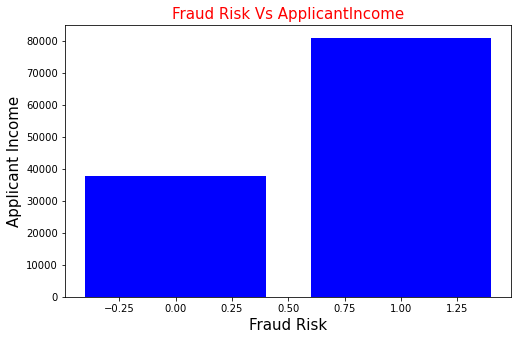

In [21]:
plt.figure(figsize=(8,5))
plt.bar(d['Fraud_Risk'],d['ApplicantIncome'],color="blue")
plt.title('Fraud Risk Vs ApplicantIncome',fontsize=15,color='red')
plt.ylabel('Applicant Income',fontsize=15)
plt.xlabel('Fraud Risk',fontsize=15)
plt.show()

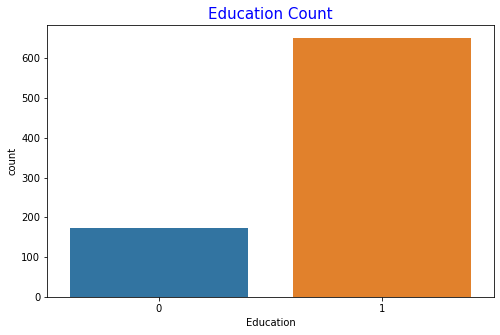

In [22]:
plt.figure(figsize=(8,5))
sns.countplot(x='Education',data=d)
plt.title('Education Count',fontsize=15,color='blue')
plt.show()

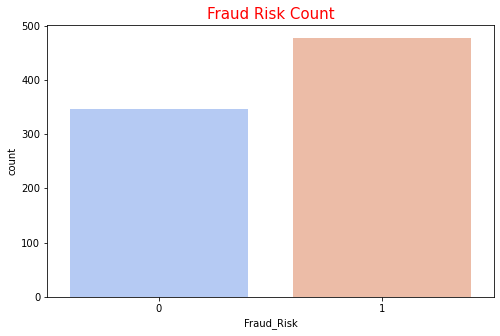

In [23]:
plt.figure(figsize=(8,5))
sns.countplot(x='Fraud_Risk',data=d,palette='coolwarm')
plt.title('Fraud Risk Count',fontsize=15,color='red')
plt.show()

<Figure size 576x360 with 0 Axes>

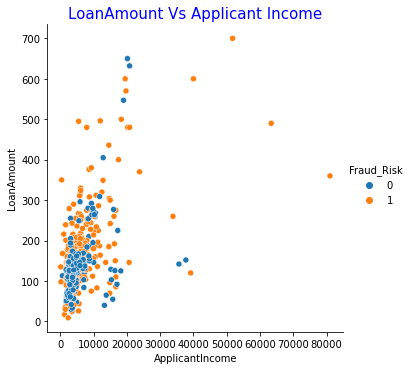

In [24]:
plt.figure(figsize=(8,5))
sns.relplot(y='LoanAmount',x='ApplicantIncome',hue='Fraud_Risk',data=d)
plt.title('LoanAmount Vs Applicant Income',fontsize=15,color='blue')
plt.show()

1    477
0    347
Name: Fraud_Risk, dtype: int64


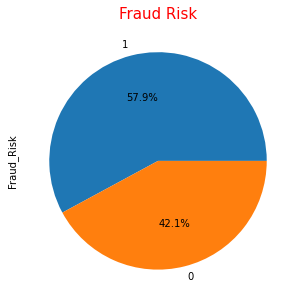

In [25]:
Risk_level=d['Fraud_Risk'].value_counts()
print(Risk_level)
plt.figure(figsize=(8,5))
plt.title('Fraud Risk',fontsize=15,color='red')
d['Fraud_Risk'].value_counts().plot.pie(autopct='%1.1f%%')
plt.show()

1    651
0    173
Name: Education, dtype: int64


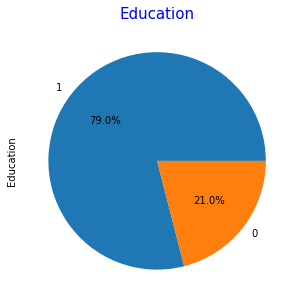

In [26]:
EDU_level=d['Education'].value_counts()
print(EDU_level)
plt.figure(figsize=(8,5))
plt.title('Education',fontsize=15,color='blue')
d['Education'].value_counts().plot.pie(autopct='%1.1f%%')
plt.show()

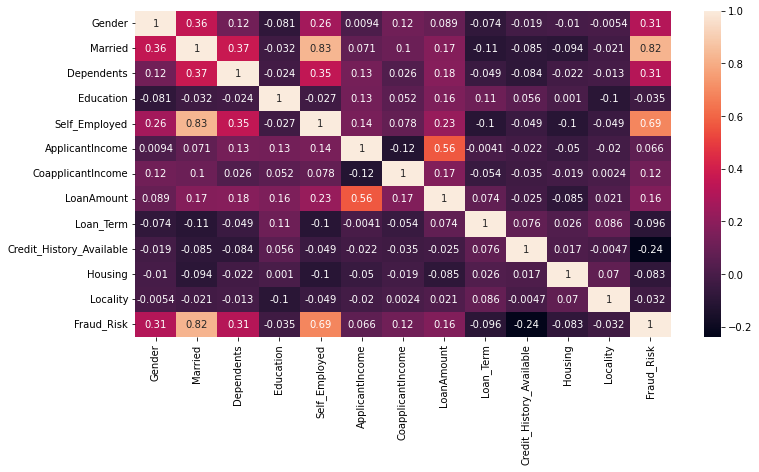

In [27]:
plt.figure(figsize=(12,6))
sns.heatmap(d.corr(),annot=True)
plt.show()

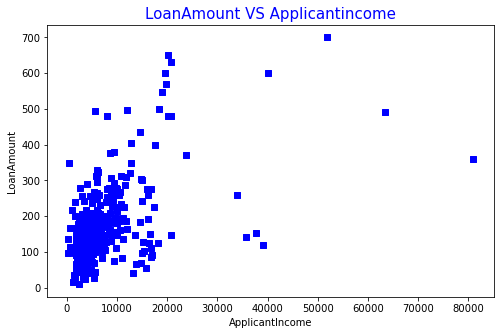

In [28]:
plt.figure(figsize=(8,5))
plt.scatter(y='LoanAmount',x='ApplicantIncome',data=d,marker=',',color='b')
plt.title('LoanAmount VS Applicantincome',fontsize=15,color='blue')
plt.ylabel('LoanAmount')
plt.xlabel('ApplicantIncome')
plt.show()

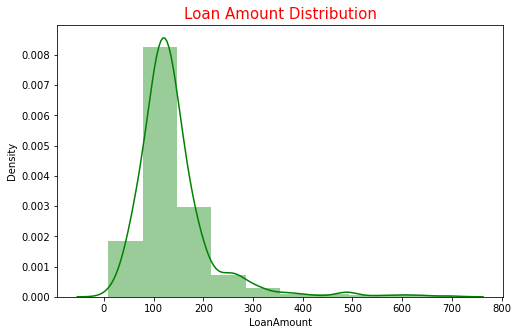

In [29]:
plt.figure(figsize=(8,5))
sns.distplot(d['LoanAmount'], bins=10, color='green')
plt.title("Loan Amount Distribution",fontsize=15,color='Red')
plt.show()

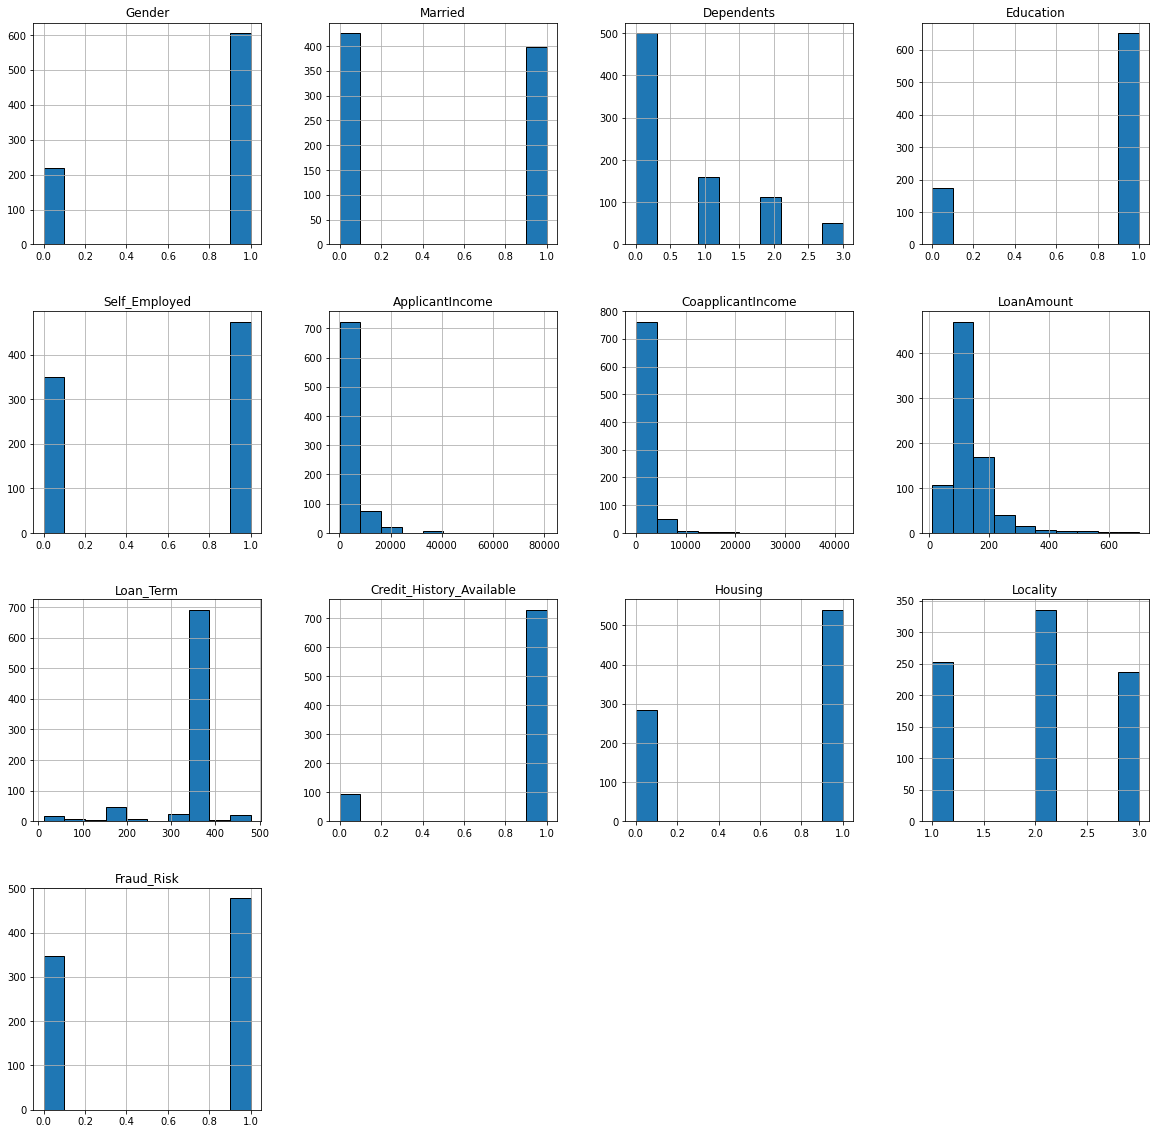

In [30]:
d.hist(edgecolor='black',figsize=(20,20))
plt.show()

In [31]:
cor = d.corr(method ='pearson')
cor = round(abs(cor.Fraud_Risk), 2)
cor.sort_values(ascending=False)

Fraud_Risk                  1.00
Married                     0.82
Self_Employed               0.69
Gender                      0.31
Dependents                  0.31
Credit_History_Available    0.24
LoanAmount                  0.16
CoapplicantIncome           0.12
Loan_Term                   0.10
Housing                     0.08
ApplicantIncome             0.07
Education                   0.04
Locality                    0.03
Name: Fraud_Risk, dtype: float64

The Fraud Risk is corelated with every other features so we don't want to avoid any features while creating model

## Machine Learning

In [32]:
x=d.drop(['Fraud_Risk'],axis=1)
x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Term,Credit_History_Available,Housing,Locality
0,1,0,0,1,0,5849,0,146,360,1,1,1
1,1,1,1,1,1,4583,1508,128,360,1,1,3
2,1,1,0,1,1,3000,0,66,360,1,1,1
3,1,1,0,0,1,2583,2358,120,360,1,1,1
4,1,0,0,1,0,6000,0,141,360,1,1,1


In [33]:
y=d.Fraud_Risk
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Fraud_Risk, dtype: int64

**Train Test Split**

### Splitting the dataset:
- test_size = 0.25 so that data is split into 75% and 25%
- random_state is applied so that each time we run we get the same result

- Dependent & Target is Fraud_Risk.
- Independent & Features ('Gender', 'Married', 'Dependents', 'Education','Self_Employed','ApplicantIncome','CoapplicantIncome', 'LoanAmount', 'Loan_Term', 'Credit_History_Available', 'Housing', 'Locality')

- **Model Creation**

In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=2)

In [35]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(618, 12) (206, 12) (618,) (206,)


### Training the data with Some of the ML approaches:
- Logistic Regression
- Random Forest Classifier
- Decision Tree Classifier
- Naive Bayes
- AdaBoost Classifier

### ML approach Functions
- Model fitting
- Predicting using test
- Accuracy score
- Confusion matrix
- Classification Report
- time taken by each model

In [36]:
def model_create(model, x_train, y_train, x_test, y_test):
    i_time=time.time()
    model.fit(x_train,y_train)
    model.score(x_test,y_test)
    y_predict=model.predict(x_test)
    acc_s=accuracy_score(y_test,y_predict)
    t=time.time()-i_time
    print('Time Taken: {}'.format(t))
    print('Accuracy: {}'.format(acc_s))
    print(classification_report(y_test,y_predict))
    plot_confusion_matrix(model, x_test, y_test)
    return model, acc_s,t

<h3>Logistic Regression</h3>

- Logistic regression  comes under the Supervised Learning technique. It is used for predicting the categorical dependent variable using a given set of independent variables.
- Logistic regression predicts the output of a categorical dependent variable. Therefore the outcome must be a categorical or discrete value.
- Logistic Regression is much similar to the Linear Regression except that how they are used. Linear Regression is used for solving Regression problems, whereas Logistic regression is used for solving the classification problems.

Time Taken: 0.08747673034667969
Accuracy: 0.9029126213592233
              precision    recall  f1-score   support

           0       0.84      0.94      0.89        84
           1       0.96      0.88      0.91       122

    accuracy                           0.90       206
   macro avg       0.90      0.91      0.90       206
weighted avg       0.91      0.90      0.90       206



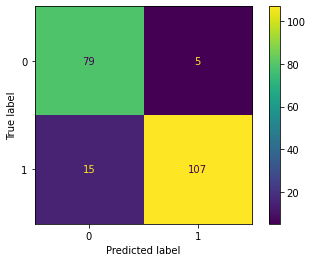

In [37]:
model_LR=LogisticRegression()
model_LR, accuracy_LR, t= model_create(model_LR, x_train, y_train, x_test, y_test)

<h3>Decision Tree Classifier</h3>

- Decision Tree is a Supervised learning technique that can be used for both classification and Regression problems, but mostly it is preferred for solving Classification problems. It is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome.
- It is a graphical representation for getting all the possible solutions to a problem/decision based on given conditions.

Time Taken: 0.023577451705932617
Accuracy: 0.9271844660194175
              precision    recall  f1-score   support

           0       0.87      0.96      0.92        84
           1       0.97      0.90      0.94       122

    accuracy                           0.93       206
   macro avg       0.92      0.93      0.93       206
weighted avg       0.93      0.93      0.93       206



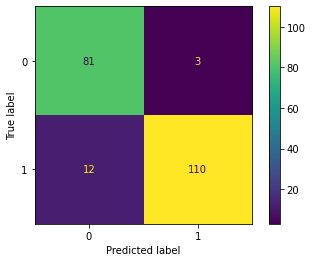

In [38]:
model_DC=DecisionTreeClassifier()
model_DC, accuracy_DC,t= model_create(model_DC, x_train, y_train, x_test, y_test)

<h3>Random Forest Classifier</h3>

- Random Forest can be used for both Classification and Regression problems in ML. It is based on the concept of ensemble learning, which is a process of combining multiple classifiers to solve a complex problem and to improve the performance of the model.
- "Random Forest is a classifier that contains a number of decision trees on various subsets of the given dataset and takes the average to improve the predictive accuracy of that dataset". Instead of relying on one decision tree, the random forest takes the prediction from each tree and based on the majority votes of predictions, and it predicts the final output.
- The greater number of trees in the forest leads to higher accuracy and prevents the problem of overfitting.

Time Taken: 0.37050700187683105
Accuracy: 0.9368932038834952
              precision    recall  f1-score   support

           0       0.87      1.00      0.93        84
           1       1.00      0.89      0.94       122

    accuracy                           0.94       206
   macro avg       0.93      0.95      0.94       206
weighted avg       0.95      0.94      0.94       206



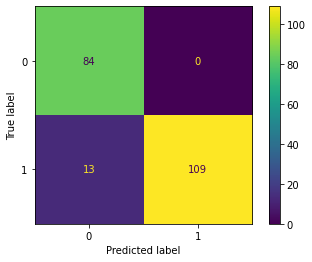

In [39]:
model_RF=RandomForestClassifier()
model_RF, accuracy_RF, t= model_create(model_RF, x_train, y_train, x_test, y_test)

<h3>Naive Bayes</h3>

- Naive: It is called Naïve because it assumes that the occurrence of a certain feature is independent of the occurrence of other features. Such as if the fruit is identified on the bases of color, shape, and taste, then red, spherical, and sweet fruit is recognized as an apple. Hence each feature individually contributes to identify that it is an apple without depending on each other.
- Bayes: It is called Bayes because it depends on the principle of Bayes Theorem.

Time Taken: 0.017633914947509766
Accuracy: 0.9029126213592233
              precision    recall  f1-score   support

           0       0.85      0.93      0.89        84
           1       0.95      0.89      0.92       122

    accuracy                           0.90       206
   macro avg       0.90      0.91      0.90       206
weighted avg       0.91      0.90      0.90       206



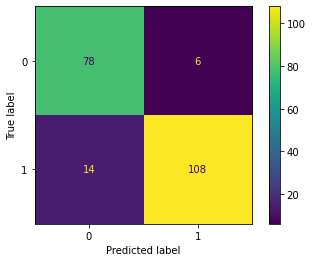

In [40]:
model_GB=GaussianNB()
model_GB, accuracy_GB, t= model_create(model_GB, x_train, y_train, x_test, y_test)

<h3>AdaBoost Classifier</h3>

- AdaBoost is an ensemble learning method. which was initially created to increase the efficiency of binary classifiers. AdaBoost uses an iterative approach to learn from the mistakes of weak classifiers, and turn them into strong ones.

Time Taken: 0.19342374801635742
Accuracy: 0.9271844660194175
              precision    recall  f1-score   support

           0       0.86      0.98      0.92        84
           1       0.98      0.89      0.94       122

    accuracy                           0.93       206
   macro avg       0.92      0.93      0.93       206
weighted avg       0.93      0.93      0.93       206



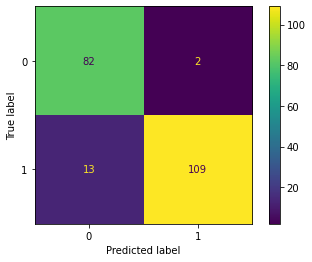

In [41]:
model_AB=AdaBoostClassifier(n_estimators=50,learning_rate=1)
model_AB, accuracy_AB, t= model_create(model_AB, x_train, y_train, x_test, y_test)

In [42]:
li = [model_LR,model_DC,model_RF,model_GB,model_AB]
d = {}
for i in li:
    i.fit(x_train,y_train)
    y_pred = i.predict(x_test)
    print(i,":",accuracy_score(y_test,y_pred)*100)
    d.update({str(i):i.score(x_test,y_test)*100})

LogisticRegression() : 90.29126213592234
DecisionTreeClassifier() : 91.74757281553399
RandomForestClassifier() : 93.20388349514563
GaussianNB() : 90.29126213592234
AdaBoostClassifier(learning_rate=1) : 92.71844660194175


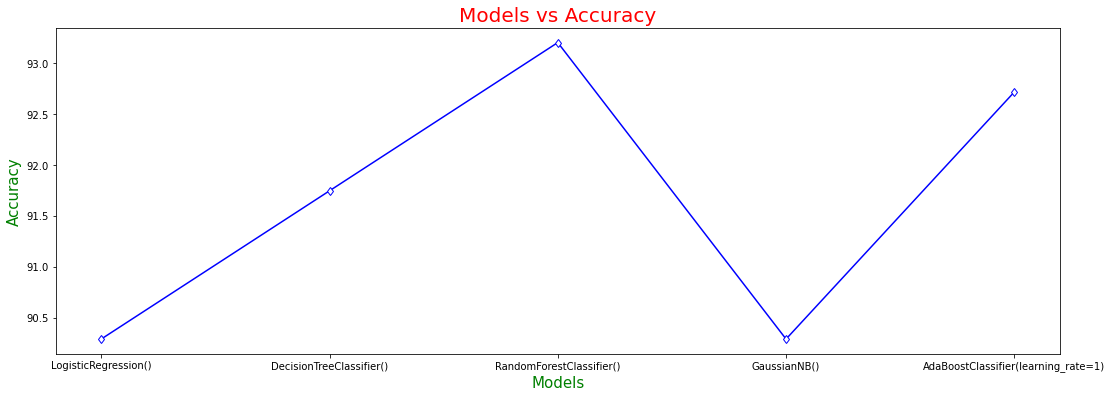

In [43]:
plt.figure(figsize=(18,6))
plt.title("Models vs Accuracy",fontsize=20,color='Red')
plt.xlabel("Models",fontsize=15,color='green')
plt.ylabel("Accuracy",fontsize=15,color='green')
plt.plot(d.keys(),d.values(),marker='d',markerfacecolor='w',color='b')
plt.show()

<h3>Conclusion:</h3>


- Time taken is maximum for Random Forest Classifier and minimum for Naive Bayes For a best model prediction
- Random Forest is the best from among the models trained to predict the accurate result with an accuracy of 93% and time taken to execute is 14s.

<table>
  <tr>
    <th>Model</th>
    <th>Accuracy Percentage</th>
      <th>Timetaken</th>
  </tr>
  <tr>
    <td><u>Logistic Regression<u></td>
    <td>90%</td>
    <td>0.03</td>
  </tr>
  <tr>
    <td><u>Decision Tree Classifier<u></td>
    <td>91%</td>
    <td>0.008</td>
  </tr>
  <tr>
    <td><u>Random Forest<u></td>
    <td>93%</td>
    <td>0.23</td>>
  </tr>
  <tr>
    <td><u>Naive Bayes<u></td>
    <td>90%</td>
        <td>0.009</td>
  </tr>
  <tr>
    <td><u>ADA Boost<u></td>
    <td>92%</td>
    <td>0.12</td>
  </tr>
</table>